
# 🎬 Movie Viewer Data Analysis with NumPy & Seaborn

## 🎯 Objective:
Analyze how movie genres, duration, and viewer types affect ratings and engagement.

Tools used:
- **Pandas** for data manipulation
- **NumPy** for statistics
- **Seaborn** for visualization


In [1]:

import pandas as pd

# Load dataset
df = pd.read_csv("movie_viewer_data.csv")
df.head()

,MovieID,Genre,Duration,ViewerAgeGroup,AvgWatchTime,Rating,Views
0,1,Thriller,112.7,Senior,90.4,NaN,22524
1,2,Sci-Fi,116.7,Adult,102.8,6.56,10894
2,3,Drama,140.4,Teen,90.5,3.54,31791
3,4,Comedy,104.2,Adult,78.1,5.30,19478
4,5,Sci-Fi,158.9,Adult,123.3,2.98,10004


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MovieID         120 non-null    int64  
 1   Genre           120 non-null    object 
 2   Duration        120 non-null    float64
 3   ViewerAgeGroup  120 non-null    object 
 4   AvgWatchTime    120 non-null    float64
 5   Rating          116 non-null    float64
 6   Views           120 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 6.7+ KB


In [22]:
df.describe()

,MovieID,Duration,AvgWatchTime,Rating,Views
count,120.000000,120.000000,120.000000,116.000000,120.000000
mean,60.500000,118.702500,101.450833,6.118448,49599.808333
std,34.785054,18.225688,23.752198,1.533856,27922.610955
min,1.000000,80.000000,53.400000,2.370000,1671.000000
25%,30.750000,106.150000,84.700000,5.237500,25801.500000
50%,60.500000,119.700000,100.300000,6.210000,47902.000000
75%,90.250000,130.250000,116.800000,7.257500,71869.750000
max,120.000000,178.200000,173.300000,9.540000,99983.000000


In [24]:
df.isnull().sum()

MovieID           0
Genre             0
Duration          0
ViewerAgeGroup    0
AvgWatchTime      0
Rating            4
Views             0
dtype: int64

In [5]:
df_clean = df.dropna()
df_clean.head()

,MovieID,Genre,Duration,ViewerAgeGroup,AvgWatchTime,Rating,Views
1,2,Sci-Fi,116.7,Adult,102.8,6.56,10894
2,3,Drama,140.4,Teen,90.5,3.54,31791
3,4,Comedy,104.2,Adult,78.1,5.30,19478
4,5,Sci-Fi,158.9,Adult,123.3,2.98,10004
5,6,Sci-Fi,119.4,Adult,109.4,6.38,92934


In [7]:
import numpy as np

duration = df_clean['Duration'].to_numpy()
rating = df_clean['Rating'].to_numpy()

print("Average Duration:", np.mean(duration))
print("Std Dev of Rating:", np.std(rating))

Average Duration: 118.37327586206894
Std Dev of Rating: 1.5272301970923772


In [9]:
corr = np.corrcoef(duration, rating)[0, 1]
print("Correlation (Duration vs Rating):", corr)

Correlation (Duration vs Rating): -0.11084592899623512


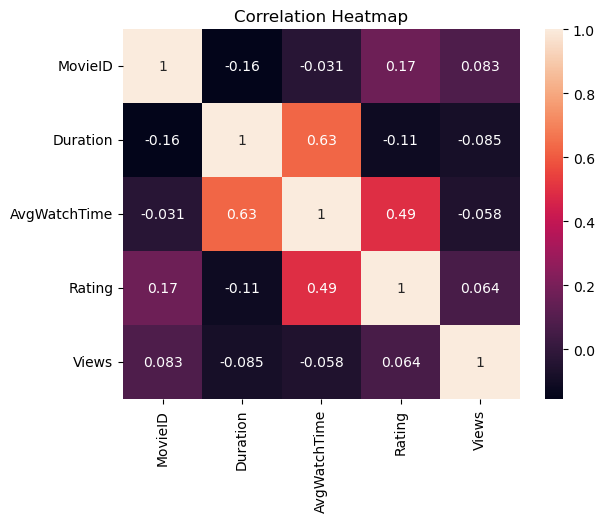

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(df_clean.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

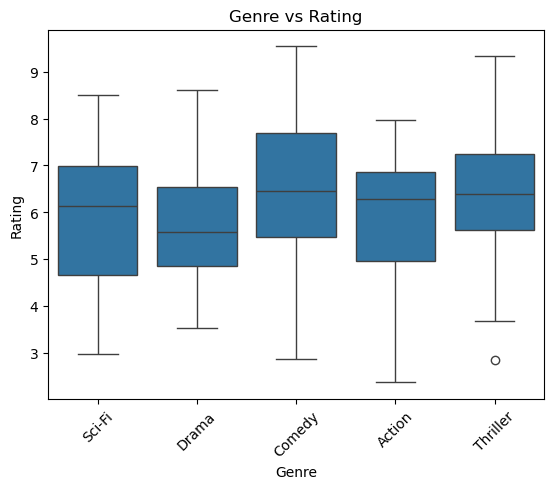

In [13]:
# Genre vs Rating
sns.boxplot(x='Genre', y='Rating', data=df_clean)
plt.title("Genre vs Rating")
plt.xticks(rotation=45)
plt.show()

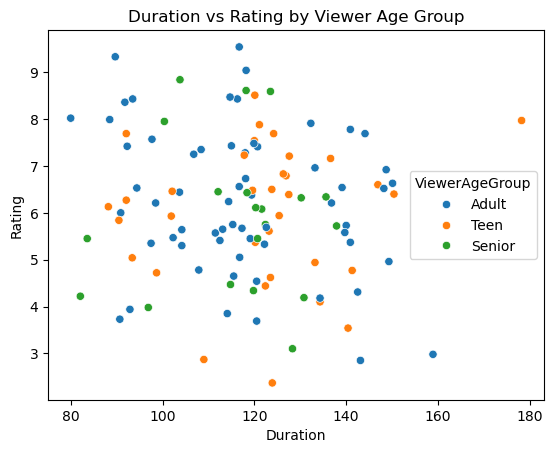

In [15]:
# Duration vs Rating
sns.scatterplot(x='Duration', y='Rating', hue='ViewerAgeGroup', data=df_clean)
plt.title("Duration vs Rating by Viewer Age Group")
plt.show()

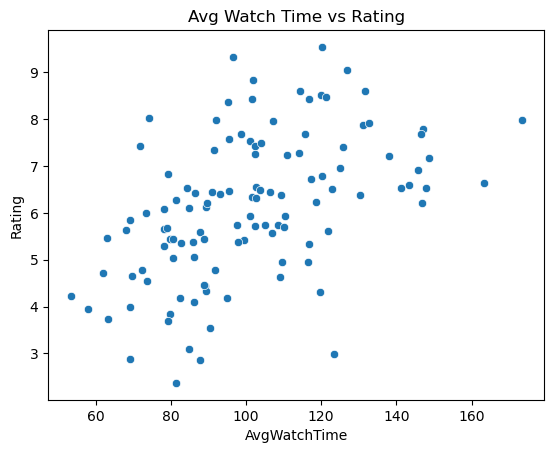

In [17]:
# Avg Watch Time vs Rating
sns.scatterplot(x='AvgWatchTime', y='Rating', data=df_clean)
plt.title("Avg Watch Time vs Rating")
plt.show()


## 🧠 Five Why’s Example

**Observation**: "Teen viewers give lower ratings to drama movies"

| Why # | Question | Answer |
|-------|----------|--------|
| 1     | Why lower ratings? | They may not enjoy the slow pace. |
| 2     | Why not enjoy slow pace? | Teens prefer action or humor. |
| 3     | Why that preference? | Faster content matches their interests. |
| 4     | Why that matters? | It keeps their attention better. |
| 5     | Why attention is hard to keep? | Due to distractions or shorter attention spans. |
